## 1. Bayesian network
1. An directed acyclic grpah (DAG) whose nodes represents random variables, $X1, X2, ..... XN$
2. For each node $X_{i}$, a CPD $P(X_{i} | Par_{G}(X_{i}))$, dependence of $X_{i}$ given its parents $G$    
3. The Bayesian network represents a joint distribution using Chain rule for Bayes networks   

$P(X_{1},X_{2},...,X_{N}) = \prod P(X_{i} | Par_{G}(X_{i}))$

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.xkcd()

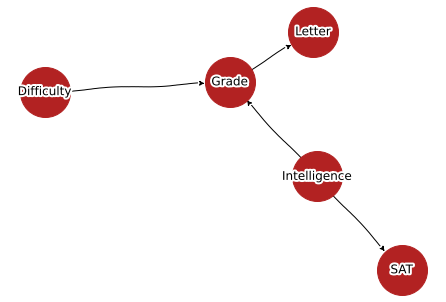

In [8]:
edges = [['Difficulty','Grade'],['Intelligence','Grade'],['Grade','Letter'],['Intelligence','SAT']]
G = nx.from_edgelist(edges, create_using=nx.DiGraph)
nx.draw(G, node_size = 2500, fontsize = 45, with_labels = True, node_color = 'firebrick',node_edge = 'black')
plt.show()

$I$ - Intelligence      
$D$ - Difficulty    
$G$ - Grade     
$S$ - SAT score   
$L$ - Letter(recommended)   

$P(I,D,G,S,L) = P(I) P(D) P(G|ID) P(L|G) P(S|I)$

**Each node is associated with a CPD**

1. Distributions of $I - intelligence$ and $D - difficulty$ are unconditional probabilities
2. Other CPDs are conditional probabilities

In [18]:
cpd_d = pd.DataFrame([[0.6,0.4]], columns = ['d0','d1'])
cpd_i = pd.DataFrame([[0.7,0.3]], columns = ['i0','i1'])

values = [[0.3,0.4,0.3],[0.05,0.25,0.7],[0.7,0.08,0.02],[0.5,0.3,0.2]]
index = pd.MultiIndex.from_tuples([('i0','d0'),('i0','d1'),('i1','d0'),('i1','d1')], names=["i", "d"])
cpd_g = pd.DataFrame(values, columns = ['g1','g2','g3'], index = index)

cpd_l = pd.DataFrame([[0.1,0.9],[0.4,0.6],[0.99,0.01]], columns = ['l0','l1'], index = ['g1','g2','g3'])
cpd_s = pd.DataFrame([[0.95,0.05],[0.2,0.8]], columns = ['s0','s1'], index = ['i0','i1'])

#### What we want is a fully parameterized BAYESIAN NETWORK and Multiply all CPDs using CHAIN RULE - FACTOR PRODUCT

**Calculate probability**

$P(i1,d0,g3,s1,l1) = P(i1) P(d0) P(g3|i1, d0) P(l1|g3) P(s1|i1)$

In [27]:
cpd_d['d0'][0] * cpd_i['i1'][0] * cpd_g.loc[('i1','d0'),'g3'] * cpd_s.loc['i1','s1'] * cpd_l.loc['g3','l1']

2.8800000000000002e-05

# 2. Causal Reasoning - (Reliable method to remove your intuition)

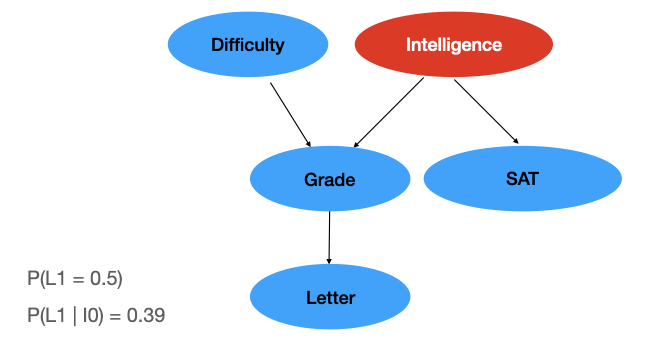


说你原来认为，你拿到一个推荐信的概率是0.5.      
然后呢，你发现自己智商很低，你觉得自己拿到推荐信的概率就小了一些，变成了0.39.    
你对自己更深的认识，修正了你错误的观点。    

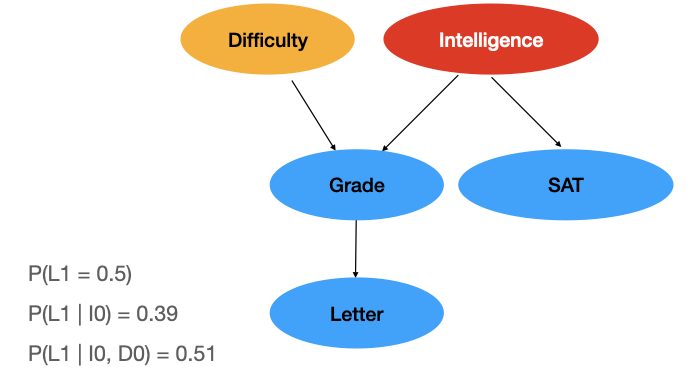

完了你去参加了考试，发现试卷很简单， 你觉得这次拿到推荐信的概率变成了0.51， 比之前的信心多了一点点。    
但由于你智商实在不高， 你的信心也就多了那么一点点。    

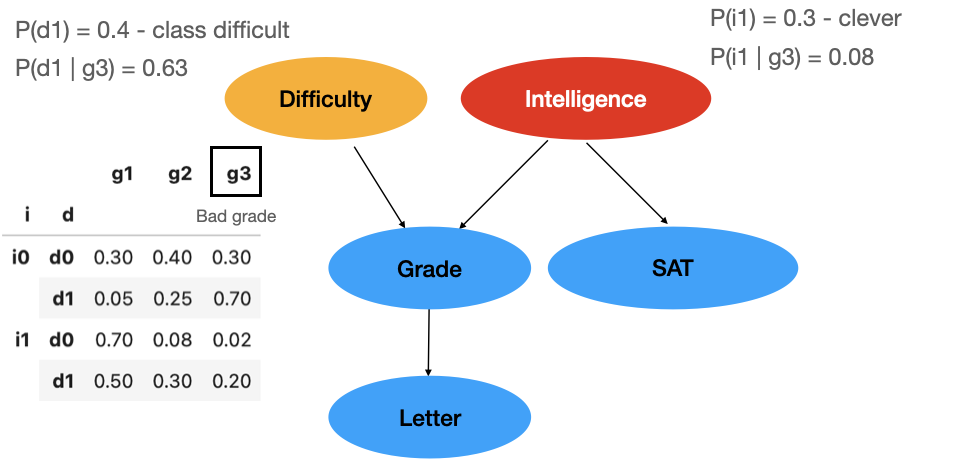

你以前觉得考试难的概率是0.4， 你觉得一个人聪明的概率是0.3。     
假设你并没参加考试， 你发现有一个同学考试得了g3，很差了。    
这时候， 你觉得考试很难的概率上升了， 变成了0.63， 你觉得这个同学很聪明的概率变小了，一下下跌到了0.08.     
这其实还挺合理的， 看一个人容易，很一场考试，需要收集更多的考试数据。   

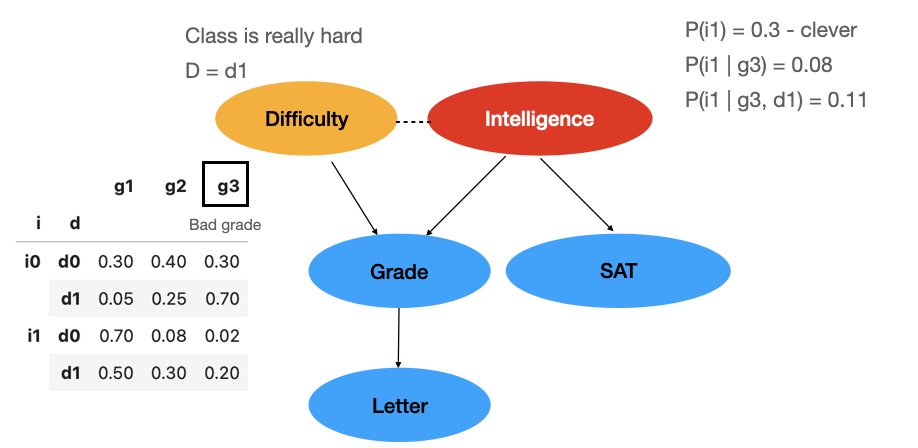


你上网看到了考试卷，发现这个卷子真的挺难的。 $D = d1$     
你抬头忘了一下刚才那个考砸了的同学， 说，这家伙好像也不那么笨，但是概率大概也就0.11吧。    
毕竟不管多难的考试，一个聪明人考到g3的概率，还是很低的。     

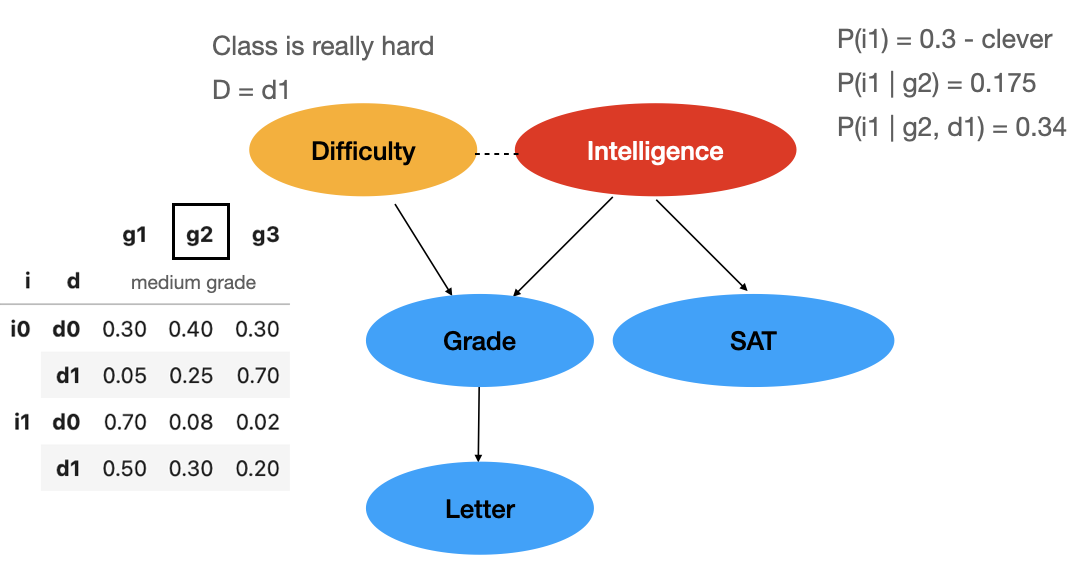

这时门外又来了一个哥们儿，说，“哎，考的好像也不咋地，也就g2吧。”        
你确定卷子很难。   
你以前觉得聪明人的概率是0.3.            
这个哥们儿是g2，你觉额他聪明的概率也就0.175.           
但是你想了一下，这个卷子这么难，这哥们儿还能考g2，那他其实很聪明了，你觉得他聪明的概率变成了0.34.    
一下子比你以前认为聪明人的概率都高了， 你在心里默念了一句 “装特么啥啊”。               

**Difficulty 和 Grade这种本来没有任何联系的东西，在给定考试成绩的时候，居然不独立了，有联系了**      
**暂且把这种推理的模式叫做，** 
## Intercausal Reasoning   

In [48]:
x1 = [True,False]
x2 = [True, False]
x = [[a,b]for a in x1 for b in x2]
y = [xx[0] or xx[1] for xx in x]
df = pd.DataFrame(x,columns = ['x1','x2'])
df['y'] = y
df['prob'] = 1 / len(y)
df

,x1,x2,y,prob
0,True,True,True,0.25
1,True,False,True,0.25
2,False,True,True,0.25
3,False,False,False,0.25


上面是一个简单的or运算

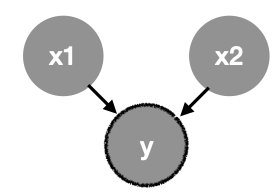

当你给定y = True的时候

In [49]:
df[df.y == True]

,x1,x2,y,prob
0,True,True,True,0.25
1,True,False,True,0.25
2,False,True,True,0.25


$P(x1=True | y=True) = 2/3, P(x2=True | y=True) = 2/3$       
$P(x1=True | y = True, x2 = False) = 1$    

意思就是当$y = True$的时候, $x1,x2$至少有一个是True， 现在$x2$是$False$的，$x1$就一定是$True$